<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/%EA%B7%9C%ED%98%B8_9%EC%9B%94_14%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import datetime
warnings.filterwarnings("ignore")
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D, Activation,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add, AveragePooling2D
)
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import LearningRateScheduler
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
!pip install opencv-python
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

## Tensorflow ## 
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array 

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import cv2
import os
from random import *
import time
import copy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/데이콘 팀플/데이콘 공유/train.csv')
test = pd.read_csv('/content/drive/My Drive/데이콘 팀플/데이콘 공유/test.csv')

x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))

for i, digit in enumerate(y):
    y_train[i, digit] = 1
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)
print(x_train.shape[0])
print(x_val.shape[0])

1843
205


In [ ]:
train_length = len(train)

digit_list = [0 for i in range(10)]
print(digit_list)

for i in range(train_length):
    digit = train.loc[i, 'digit']
    if digit==0: digit_list[0] += 1
    elif digit ==1: digit_list[1] += 1
    elif digit ==2: digit_list[2] += 1
    elif digit ==3: digit_list[3] += 1
    elif digit ==4: digit_list[4] += 1
    elif digit ==5: digit_list[5] += 1
    elif digit ==6: digit_list[6] += 1
    elif digit ==7: digit_list[7] += 1
    elif digit ==8: digit_list[8] += 1
    elif digit ==9: digit_list[9] += 1
print(digit_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[191, 202, 233, 205, 207, 225, 212, 194, 182, 197]


In [ ]:
def make_folder(directory_path):
    if not os.path.isdir(directory_path):
        os.mkdir(directory_path) 
        
path_train = os.path.join(os.getcwd(), '/content/drive/My Drive/데이콘 팀플/trainimg')
path_val = os.path.join(os.getcwd(), '/content/drive/My Drive/데이콘 팀플/valimg')
path_test = os.path.join(os.getcwd(), '/content/drive/My Drive/데이콘 팀플/testimg')



make_folder(path_train)
make_folder(path_val)
make_folder(path_test)

for i in range(10):
    path_train_digit = os.path.join(path_train, str(i))
    path_val_digit = os.path.join(path_val, str(i))
    make_folder(path_train_digit)
    make_folder(path_val_digit)
    

for i in range(len(train)):
    digit = train.loc[i, 'digit']
    #print(i)
    letter = train.loc[i, 'letter'] # letter
    img = train.loc[i, '0':].values.reshape(28, 28).astype(int)

    path_train_digit = os.path.join(path_train, str(digit))
    path_val_digit = os.path.join(path_val, str(digit))
    # cv2.imwrite(img, 'save_name')
    if digit == 0:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 1:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 2:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 3:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 4:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 5:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        cv2.imwrite(path_train_image, img)
    elif digit == 6:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 7:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 8:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
    elif digit == 9:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

for i in range(len(test)):

    letter = test.loc[i, 'letter'] # letter
    img = test.loc[i, '0':].values.reshape(28, 28).astype(int)
    path_test_digit = os.path.join(path_test, '%d_%c.jpg'%(i, letter))
    cv2.imwrite(path_test_digit, img)

Train model

(28, 28)


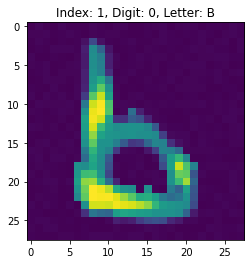

In [ ]:
idx = 1
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int) # 0~783
print(img.shape)
digit = train.loc[idx, 'digit'] # digit
letter = train.loc[idx, 'letter'] # letter

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [ ]:
img_size = 64
data_transforms = {
    'train': transforms.Compose([
        #agu.ImageNetPolicy(),
        
        transforms.Resize([img_size,img_size]),
        #transforms.RandomResizedCrop(int(img_size*0.8)),
        #transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.Grayscale(num_output_channels=1),
        #transforms.Resize([img_size,img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize([img_size,img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
}

data_dir = os.path.join(os.getcwd(), 'data/emnist')
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=16)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print(dataset_sizes, class_names)

FileNotFoundError: ignored

In [ ]:
# train_datagen = ImageDataGenerator(

#                                  width_shift_range=5,
#                                  height_shift_range=5,
#                                  rotation_range=10,
#                                  zoom_range=0.05
#     )
# test_datagen = ImageDataGenerator()

In [ ]:
# 이미지 생성기의 선언
# datagen = ImageDataGenerator(
#                                  width_shift_range=5,
#                                  height_shift_range=5,
#                                  rotation_range=10,
#                                  zoom_range=0.05)  


# # flow형태의 정의
# flow1=datagen.flow(X_image,X_letter,batch_size=32,seed=2020) 
# flow2=datagen.flow(X_image,Y,batch_size=32,seed=2020)

이미지 문자 라벨 생성


제너레이트 한 모델을 위해 모델1 작성

In [ ]:
# dropout_rate=0.5
model1 = Sequential()
model1.add(Conv2D(256, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model1.add(Conv2D(256, kernel_size = 3, activation='relu'))
model1.add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
model1.add(Dropout(0.5))

model1.add(Conv2D(128, kernel_size = 3, activation='relu'))
model1.add(Conv2D(128, kernel_size = 3, activation='relu'))
model1.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model1.add(Dropout(0.5))



model1.add(Conv2D(128, kernel_size = 4, activation='relu'))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 256)       590080    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 256)       1638656   
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 128)       295040    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, factor=0.1,patience=5)

NameError: ignored

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=8):


    global_info = []
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    early_stopping = EarlyStopping(patience=11, verbose=True)
    for epoch in range(num_epochs):
        local_info = []
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':

                model.train()  # Set model to training mode
            else:

                model.eval()   # Set model to evaluate mode
                if epoch >0:
                    scheduler.step(val_loss)
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            if phase == 'val':
                val_loss = running_loss / dataset_sizes['val']
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            #(Variable(x).data).cpu().numpy()
            if phase == 'train':
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)
            else:
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)



            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        lr_get = get_lr(optimizer)
        print("Current learning rate : {:.8f}".format(lr_get))
        global_info.append(local_info)
        if phase =='val':
            early_stopping(epoch_loss, model)

            if early_stopping.early_stop:
                print("Early stopping")
                break

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
model = train_model(model1, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=40)

In [ ]:
name='test0913_1'

In [ ]:
torch.save(model, '/content/drive/My Drive/데이콘 팀플/models/{}.pth'.format(name))

In [ ]:
import natsort as nt
from PIL import Image
from torch.autograd import Variable 
def test_model():
    data_transforms = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize([img_size,img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    model_ft = torch.load('/content/drive/My Drive/데이콘 팀플/models/{}.pth'.format(name), map_location=device)
    
    path_test = os.path.join(os.getcwd(), 'data/emnist/test')
    image_list = nt.natsorted(os.listdir(path_test))
    output_list = []
    for i, images in enumerate(image_list):
        path_test_image = os.path.join(path_test, images)
        image = Image.open(path_test_image)
        image = data_transforms(image)
        image.unsqueeze_(dim=0)
        image = Variable(image)
        image = image.cuda(device)
        torch.no_grad()
        output = model(image)
        #print(output)
        output = torch.argmax(output, dim=1)
        
        output_list.append(output)
        
    return output_list
output = test_model()


model save

In [ ]:
#제너레이트 안한 모델1 저장
submission = pd.read_csv('/content/drive/My Drive/데이콘 팀플/데이콘 공유/submission.csv')
submission.digit = torch.cat(output).detach().cpu().numpy()
submission.to_csv('/content/drive/My Drive/데이콘 팀플/models/{}.csv'.format(name), index=False)

,id,digit
0,2049,6
1,2050,9
2,2051,3
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,3


In [ ]:
name = 'DinoLove_1'#이름
submission.to_csv('/content/drive/My Drive/데이콘 팀플/데이콘 공유/{}.csv'.format(name), index=False)#경로
model.save('/content/drive/My Drive/데이콘 팀플/데이콘 공유/{}.h5'.format(name))#경로

In [ ]:
#제너레이트 한 모델2 저장
submission = pd.read_csv('/content/drive/My Drive/데이콘 팀플/데이콘 공유/submission.csv')
submission['digit'] = np.argmax(model2.predict(x_test),axis=1)
submission

NameError: ignored

In [ ]:
name = 'DinoLove_2'#이름
submission.to_csv('/content/drive/My Drive/데이콘 팀플/데이콘 공유/{}.csv'.format(name), index=False)#경로
model2.save('/content/drive/My Drive/데이콘 팀플/데이콘 공유/{}.h5'.format(name))#경로